# Fit resonance curve

In [1]:
# xaratustrah
# 2020

from iqtools import *
from scipy.optimize import curve_fit
%matplotlib qt

In [2]:
filename='amp_off_ref_0_span_10.Specan'

In [3]:
ff, pp, units = tools.read_specan_xml(filename)

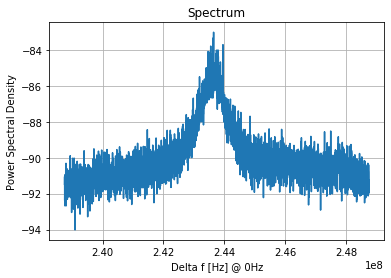

In [4]:
plot_spectrum(ff, (pp))

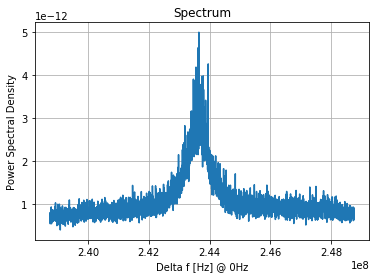

In [5]:
pp_watt = IQBase.get_watt(pp)
plot_spectrum(ff, pp_watt)

In [6]:
def fit_function_1(x, *p):
    """
    Line + 1 Gaussian
    """
    return p[0] + p[1] * x + p[2] * np.exp(-(x - p[3]) ** 2 / (2. * p[4] ** 2))

In [7]:
    y = pp_watt
    x = np.arange(len(y))

    # Estimate for mean and sigma
    mean = y.argmax()
    sigma = 100
    offset = y[mean - 250]
    slope = 1
    amp = 1
    p = [offset, slope, amp, mean, sigma]
    # defining the fitting region
    data_cut = (x > mean - 1500) & (x < mean + 1500)

    # fit
    popt_1, pcov_1 = curve_fit(fit_function_1, x[data_cut], y[data_cut], p0=p)


In [8]:
def fit_function_2(x, *p):
    """
    Resonance curve
    """
    return p[0] + p[1] * x + p[2] / (1 + p[3] * (x / p[4] - p[4] / x)**2)

In [9]:
    y = pp_watt
    x = np.arange(len(y))
    
    # provide some estimates
    NoiseA = y[mean - 1800]
    NoiseB = 0.1
    NoiseC = 0.1
    Q = 510
    f0 = y.argmax()
    p = [NoiseA, NoiseB, NoiseC, Q, f0]
    # defining the fitting region
    data_cut = (x > mean - 1800) & (x < mean + 1800)
    # fit
    popt_2, pcov_2 = curve_fit(fit_function_2, x[data_cut], y[data_cut], p0=p)

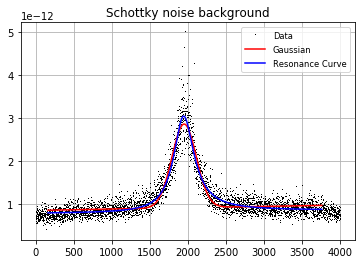

In [10]:
    # plot with original data
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(x, y, 'k,', label='Data')
    ax.plot(x[data_cut], fit_function_1(x[data_cut], *popt_1), 'r', label='Gaussian')
    ax.plot(x[data_cut], fit_function_2(x[data_cut], *popt_2), 'b', label='Resonance Curve')
    # Now add the legend with some customizations.
    legend = ax.legend(loc='upper right', shadow=False)

    # Set legend fontsize
    for label in legend.get_texts():
        label.set_fontsize('small')
    plt.title('Schottky noise background')
    plt.grid()
    plt.savefig('fit.pdf')

In [11]:
print(popt_2)

[7.90674192e-13 1.42094074e-17 2.22372932e-12 3.59729835e+01
 1.94396200e+03]
